In [61]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

--2022-09-30 11:14:36--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘AER_credit_card_data.csv.3’

AER_credit_card_dat 100%[===================>]  71.53K  --.-KB/s    in 0.03s   

2022-09-30 11:14:37 (2.29 MB/s) - ‘AER_credit_card_data.csv.3’ saved [73250/73250]



In [62]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [63]:
df=pd.read_csv("AER_credit_card_data.csv")

In [64]:

def yesno(val):
    if val == 'yes':
        return 1 
    else : 
        return 0
    

df["card"] = df.card.map(yesno)


In [65]:
from sklearn.model_selection import train_test_split


In [66]:
y_train

1105    0
431     0
407     1
1217    1
1133    1
       ..
416     1
1162    0
128     1
413     1
1203    0
Name: card, Length: 791, dtype: int64

In [67]:
df["owner"] = df.owner.map(yesno)
df["selfemp"] = df.owner.map(yesno)

In [68]:
y=df.card
X_train=df
X_train.drop(columns="card",inplace=True)

In [69]:
X_train, X_test, y_train, y_test=train_test_split(X_train,y,test_size=0.2,random_state=1)

In [70]:
X_train, X_val, y_train, y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=1)

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [72]:
df.columns

Index(['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [73]:
numerical=['reports', 'age', 'income', 'share', 'expenditure',
       'dependents', 'months', 'majorcards', 'active']

In [75]:
# for c in numerical:
#     auc = roc_auc_score(y_train, X_train[c])
#     if auc < 0.5:
#         auc = roc_auc_score(y_train, -df_train[c])
#     print('%9s, %.3f' % (c, auc))

In [76]:
for c in numerical:
    auc=roc_auc_score(y_train,X_train[c])
    if auc<0.5:
        auc= roc_auc_score(y_train, -X_train[c])
    print('%9s, %.3f' % (c, auc))

  reports, 0.717
      age, 0.524
   income, 0.591
    share, 0.989
expenditure, 0.991
dependents, 0.533
   months, 0.529
majorcards, 0.534
   active, 0.604


In [78]:
X_val.expenditure

1081    121.63330
479       0.00000
317      34.15583
1103      0.00000
1179    161.16170
          ...    
1256    169.87670
168     148.26000
882      79.68500
233      77.04667
704     185.73830
Name: expenditure, Length: 264, dtype: float64

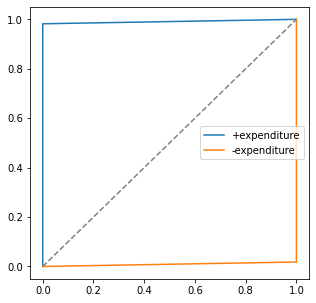

In [79]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, X_train.expenditure)
plt.plot(fpr, tpr, label='+expenditure')

fpr, tpr, _ = roc_curve(y_train, -X_train.expenditure)
plt.plot(fpr, tpr, label='-expenditure')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

In [80]:
import seaborn as sns 

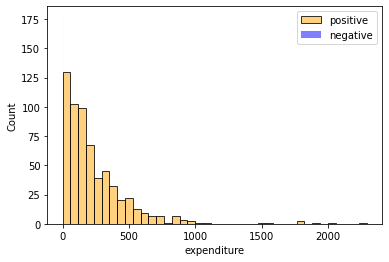

In [82]:
sns.histplot(X_train.expenditure[y_train == 1],
            
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(X_train.expenditure[y_train == 0],
          
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

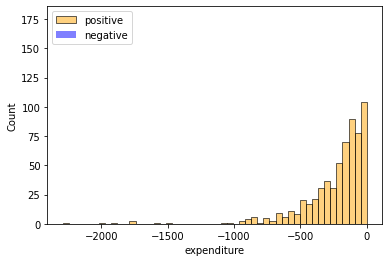

In [84]:
sns.histplot(-X_train.expenditure[y_train == 1],
             bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(-X_train.expenditure[y_train == 0],
            bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

In [85]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression